In [ ]:
# Jupyter notebook to generate KM survival curves for the different kinds of cancer I'm studying

In [1]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

In [28]:
icc_file_name = "../../Data/RFS_Scout.xlsx"
icc_data = pd.read_excel(icc_file_name)

hcc_file_name = "../../Data/HCC_survival_sorted.xlsx"
hcc_data = pd.read_excel(hcc_file_name)
hcc_data["HDFS_code"] = hcc_data["Recurrence_Code_1"] == 1


hcc_data["HDFS"] = ''

for idx in range(len(hcc_data)):
    if hcc_data.HDFS_code.iloc[idx] == True:
        hcc_data["HDFS"].iloc[idx] = hcc_data.RFS.iloc[idx]    
    else:
        hcc_data["HDFS"].iloc[idx] = hcc_data.OS.iloc[idx]

# if hcc_data["HDFS_code"] == True:
#     hcc_data["HDFS"] = hcc_data["RFS"]
# else:
#     hcc_data["HDFS"] = hcc_data["OS"]


mcrc_file_name = "../../Data/TCIA_CRLM_Cases_Final_De-identified.xlsx"
mcrc_data = pd.read_excel(mcrc_file_name)

/home/katy/anaconda3/envs/deepicc/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/katy/anaconda3/envs/deepicc/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


/home/katy/anaconda3/envs/deepicc/lib/python3.9/site-packages/lifelines/utils/__init__.py:1175: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


Text(0.5, 0, 'Time (months)')

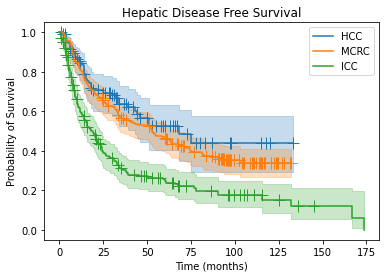

In [21]:
# Hepatic Disease Free Survival (HDFS)

kmf = KaplanMeierFitter()
ax = plt.subplot(111)

# HCC survival
kmf.fit(hcc_data.HDFS, hcc_data.HDFS_code, label='HCC')
kmf.plot_survival_function(ax=ax, show_censors=True)

# MCRC survival
kmf.fit(mcrc_data.LiverDFS_months, mcrc_data.HDFS_status, label='MCRC')
kmf.plot_survival_function(ax=ax, show_censors=True)

# ICC survival
kmf.fit(icc_data.RFS, icc_data.RFS_Code, label='ICC')
kmf.plot_survival_function(ax=ax, show_censors=True)

plt.title("Hepatic Disease Free Survival")
plt.ylabel("Probability of Survival")
plt.xlabel("Time (months)")

Text(0.5, 0, 'Time (months)')

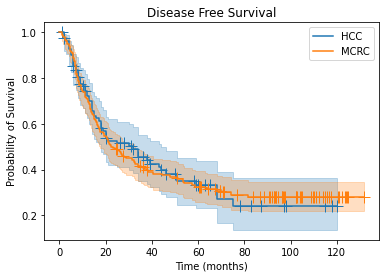

In [31]:
# Disease Free Survival

kmf2 = KaplanMeierFitter()
ax2 = plt.subplot(111)

# HCC survival
kmf2.fit(hcc_data.RFS, hcc_data["Recurrence_Code_2"], label='HCC')
kmf2.plot(ax=ax2, show_censors=True)

# MCRC survival
kmf2.fit(mcrc_data.DFS_months, mcrc_data.DFS_status, label='MCRC')
kmf2.plot(ax=ax2, show_censors=True)

plt.title("Disease Free Survival")
plt.ylabel("Probability of Survival")
plt.xlabel("Time (months)")

Text(0.5, 0, 'Time (months)')

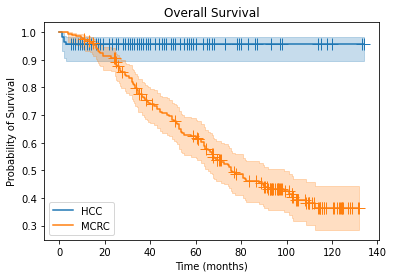

In [33]:
# Overall Survival

kmf3 = KaplanMeierFitter()
ax3 = plt.subplot(111)

# HCC survival
kmf3.fit(hcc_data.OS, hcc_data["Status "], label = 'HCC')
kmf3.plot(ax=ax3, show_censors=True)

# MCRC survival
kmf3.fit(mcrc_data.OS_months, mcrc_data.LFU_status, label='MCRC')
kmf3.plot(ax=ax3, show_censors=True)

plt.title("Overall Survival")
plt.ylabel("Probability of Survival")
plt.xlabel("Time (months)")